In [1]:
import numpy as np
import matplotlib.pyplot as plt
from four_rooms import FourRoomsEnvironment
from option import Option

""" Simple agent planning with dynamic programming on state value function,
    using stored P and R values learnt by a model learning agent """
class SMDPPlanningAgent():
    def __init__(self, R_file="save/R_MC_estimates_100k.npy", 
                 P_file="save/P_MC_estimates_100k.npy"):
        self.options = \
         [Option("left"), Option("up"), Option("right"), Option("down"),
          Option("topleft->topright"), Option("topleft->botleft"),
          Option("topright->topleft"), Option("topright->botright"),
          Option("botleft->topleft"), Option("botleft->botright"),
          Option("botright->botleft"), Option("botright->topright")]
        self.current_option = None
            
        # Initialize state value table
        n_states = 13 * 13
        self.V = np.zeros(n_states) 
        
        # Retrieve R and P tables previously learnt
        self.R = np.load(R_file)
        self.P = np.load(P_file)
        
    # Run synchronous value iteration 
    def learnValueFunction(self, threshold=0.01, visualize=True):
        V_old = self.V
        self.V = (self.R + np.dot(self.P[:, :], self.V)).max(axis=1)
        while np.sum((self.V - V_old) ** 2) > threshold:
            V_old = self.V
            self.V = (self.R + np.dot(self.P, self.V)).max(axis=1)
            if visualize:
                self._visualizeValueFunction()
    
    def greedyPolicy(self, state):
        # Check if current option is finishing here
        if self.current_option is not None and \
                self.current_option.beta[state] == 1:
            self.current_option = None
                
        # Pick new option greedily if needed
        if self.current_option is None:
            self._pickNewOptionGreedily(state)
        
        # Select action according to policy of current option 
        action, _ = self.current_option.pickAction(state)
        return action
        
    # Pick new option according to model and state value function greedily
    def _pickNewOptionGreedily(self, state):
        s = self._sIdx(state)
        option_index = np.argmax(self.R[s] + self.P[s].dot(self.V))
        self.current_option = self.options[option_index]
    
    def _sIdx(self, state):
        return state[0] * 13 + state[1]
    
    def _visualizeValueFunction(self):
        plt.imshow(self.V.reshape(13, 13))
        plt.colorbar()
        plt.show()

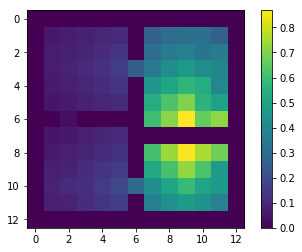

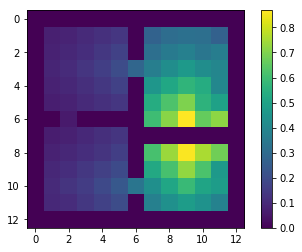

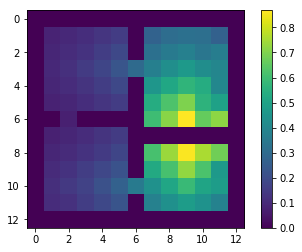

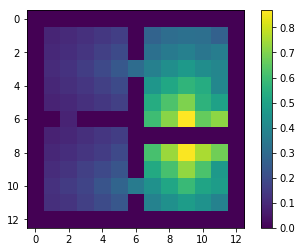

In [2]:
agent = SMDPPlanningAgent()
agent.learnValueFunction()

In [20]:
from four_rooms import FourRoomsEnvironment

env = FourRoomsEnvironment()

def run_episode():
    state = env.reset()
    while True:
        action = agent.greedyPolicy(state)
        print("State = {}, Option = {}, Action = {}".format(
            state, agent.current_option, action))
        next_state, reward, done = env.step(action)
        state = next_state
        if done:
            break
            
run_episode()

State = (1, 1), Option = topleft->topright, Action = right
State = (1, 1), Option = topleft->topright, Action = right
State = (1, 2), Option = topleft->topright, Action = right
State = (1, 3), Option = topleft->topright, Action = right
State = (1, 4), Option = topleft->topright, Action = right
State = (1, 4), Option = topleft->topright, Action = right
State = (2, 4), Option = topleft->topright, Action = right
State = (3, 4), Option = topleft->topright, Action = right
State = (4, 4), Option = topleft->topright, Action = right
State = (4, 5), Option = topleft->topright, Action = up
State = (5, 5), Option = topleft->topright, Action = up
State = (4, 5), Option = topleft->topright, Action = up
State = (3, 5), Option = topleft->topright, Action = right
State = (3, 6), Option = right, Action = right
State = (3, 6), Option = right, Action = right
State = (3, 7), Option = down, Action = down
State = (4, 7), Option = down, Action = down
State = (5, 7), Option = topright->botright, Action = down